In [1]:
%matplotlib inline

#%matplotlib 
#import matplotlib.pyplot as plt
#plt.ion()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time

In [4]:
cwd = os.getcwd()
NOTEBOOK_DIR = os.path.dirname(cwd+'/')
ROOT = os.path.dirname(NOTEBOOK_DIR)

import sys
sys.path.append(ROOT)

In [5]:
from utils.plot import *
from utils.tools import *
from utils.nn import TARGET_FUNCS_DICT, LOSS_DICT
from networks import two_layer_net

In [6]:
FIGURES_DIR = os.path.join(ROOT, 'figures/2-layer/neurons_dynamic')

## Constants

In [7]:
n_samples = 500
input_dim = 3
width = 1024
bias = True
n_steps = 1000
base_lr = 0.01
batch_size = None
tgt_func_name = "target_func"

SEED = 42
pause = 1e-6

In [8]:
set_random_seeds(SEED)

## Set up data, model, loss and optimizer

In [9]:
# data
X = torch.randn(size=(n_samples, input_dim), requires_grad=False)
target_func = TARGET_FUNCS_DICT[tgt_func_name]
y = target_func(X).reshape(len(X), 1)

# network
network = two_layer_net.TwoLayerNet(input_dim=input_dim, width=width, bias=bias)
network.train()

# loss & optimizer
loss = LOSS_DICT['mse'](reduction='mean')
optimizer = torch.optim.SGD(network.parameters(), lr=width * base_lr)

## Plot initial neurons

In [10]:
signs = network.output_layer.weight.data.detach().numpy()[0]
init_neurons = network.input_layer.weight.data.detach().clone().numpy()

## Train for a few steps

In [11]:
if batch_size is None:
    batch_size = n_samples

In [12]:
# figsize = (8, 8)
    # fig = plt.figure(figsize=figsize)
    # 
    # cmpt_steps = 0
    # batch_index = 0
    # while cmpt_steps < 40:
    #     with torch.no_grad():
    #         plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
    #         fig_path = os.path.join(FIGURES_DIR, 'step_{}.png'.format(cmpt_steps))
    #         plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
    #         fig.canvas.draw()
    #         # plt.pause(pause)
    #         fig.canvas.flush_events()
    # 
    #     if batch_index >= n_samples:
    #         batch_index = 0
    #     # batch inputs and targets
    #     batch_x = X[batch_index: batch_index + batch_size, :]
    #     batch_y = y[batch_index: batch_index + batch_size]
    #     batch_index += batch_index + batch_size
    # 
    #     # forward
    #     y_hat = network.forward(batch_x)
    #     loss_ = loss(y_hat, batch_y)
    # 
    #     # backward and gradient step
    #     print(loss_.detach().item())
    #     loss_.backward()
    #     optimizer.step()
    # 
    #     cmpt_steps += 1
    # 
    # with torch.no_grad():
    #     plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
    #     fig_path = os.path.join(FIGURES_DIR, 'step_{}.png'.format(cmpt_steps))
    #     plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
    #     fig.canvas.draw()
    #     # plt.pause(pause)
    #     fig.canvas.flush_events()

## Plot loss

1.931801199913025
1.8972053527832031
1.8293886184692383
1.7308306694030762
1.6046844720840454
1.4543958902359009
1.2838891744613647
1.0975967645645142
0.9021202921867371
0.7076408267021179
0.5303943753242493
0.39421045780181885
0.3297710716724396
0.36724331974983215
0.5207859873771667
0.7694721817970276
1.0475026369094849
1.258638858795166
1.316781997680664
1.1915098428726196
0.9257789254188538
0.6113892197608948
0.3423992097377777
0.178298220038414
0.1340850442647934
0.19156114757061005
0.31672587990760803
0.4735245406627655
0.6310353875160217
0.7661982774734497
0.863580584526062
0.9147735834121704
0.9177960157394409
0.8762627840042114
0.7988779544830322
0.6984812021255493
0.5909698605537415
0.4938192069530487
0.4243086874485016
0.3968871533870697
0.4199439585208893
0.4923133850097656
0.6010031700134277
0.7212445139884949
0.8213163018226624
0.8719301819801331
0.8578911423683167
0.7859815955162048
0.6849761009216309
0.5959070920944214
0.5548935532569885
0.5763493180274963
0.64503437280

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/karlhajjar/Documents/projects/learning-structure/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dk/nmyl016j3lj9xqhfs1wy5fgr0000gn/T/ipykernel_21558/3092605646.py", line 9, in <module>
    plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
  File "/Users/karlhajjar/Documents/projects/learning-structure/env/lib/python3.9/site-packages/matplotlib/pyplot.py", line 967, in savefig
    fig.canvas.draw_idle()   # need this if 'transparent=True' to reset colors
  File "/Users/karlhajjar/Documents/projects/learning-structure/env/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 2055, in draw_idle
    self.draw(*args, **kwargs)
  File "/Users/karlhajjar/Documents/projects/learning-structure/env/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py", line 406, in draw
    self.figure.draw(self.renderer)


TypeError: object of type 'NoneType' has no len()

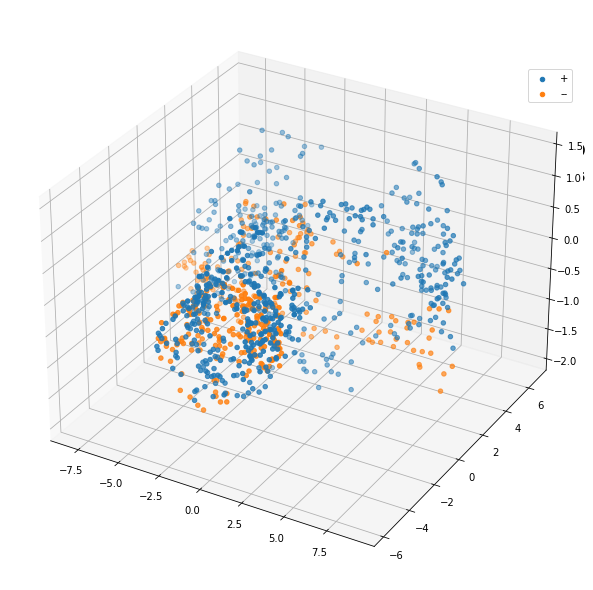

In [12]:
losses = []
neurons = [network.input_layer.weight.data.detach().clone().numpy()]
fig = plt.figure(figsize=(8,8))

cmpt_steps = 0
batch_index = 0
while cmpt_steps < 40:
    plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
    fig_path = os.path.join(FIGURES_DIR, 'bias', 'step_{}.png'.format(cmpt_steps))
    plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
    
    if batch_index >= n_samples:
        batch_index = 0
    # batch inputs and targets
    batch_x = X[batch_index: batch_index + batch_size, :]
    batch_y = y[batch_index: batch_index + batch_size]
    batch_index += batch_index + batch_size

    # forward
    y_hat = network.forward(batch_x)
    loss_ = loss(y_hat, batch_y)

    # backward and gradient step
    print(loss_.detach().item())
    losses.append(loss_.detach().item())
    loss_.backward()
    optimizer.step()
    
    neurons.append(network.input_layer.weight.data.detach().clone().numpy())

    cmpt_steps += 1
    
plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
fig_path = os.path.join(FIGURES_DIR, 'bias', 'step_{}.png'.format(cmpt_steps))
plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)

ERROR! Session/line number was not unique in database. History logging moved to new session 1632


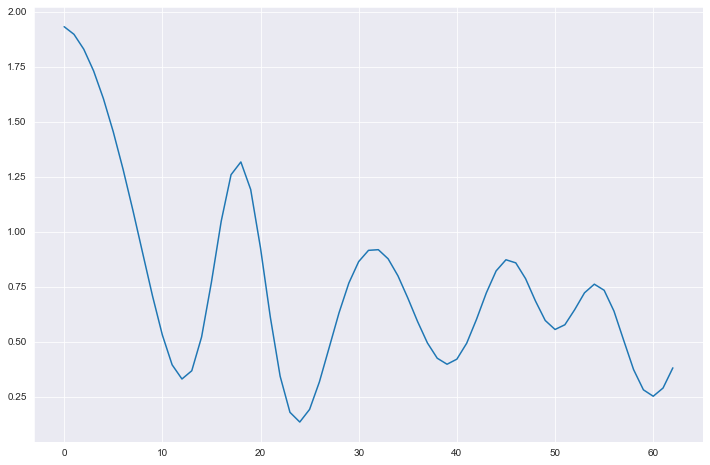

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(losses)), losses)